In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# csv from https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
dfTotal = pd.read_csv('covid19.csv')

print(dfTotal.head())

   pruid            prname              prnameFR        date  numconf  \
0     35           Ontario               Ontario  31-01-2020        3   
1     59  British Columbia  Colombie-Britannique  31-01-2020        1   
2      1            Canada                Canada  31-01-2020        4   
3     35           Ontario               Ontario  08-02-2020        3   
4     59  British Columbia  Colombie-Britannique  08-02-2020        4   

   numprob  numdeaths  numtotal  numtoday  
0        0          0         3         3  
1        0          0         1         1  
2        0          0         4         4  
3        0          0         3         0  
4        0          0         4         3  


In [3]:
# extracting data from Ontario
ontario = dfTotal.loc[dfTotal['pruid'] == 35]
print(ontario)

     pruid   prname prnameFR        date  numconf  numprob  numdeaths  \
0       35  Ontario  Ontario  31-01-2020        3        0          0   
3       35  Ontario  Ontario  08-02-2020        3        0          0   
6       35  Ontario  Ontario  16-02-2020        3        0          0   
9       35  Ontario  Ontario  21-02-2020        3        0          0   
12      35  Ontario  Ontario  24-02-2020        4        0          0   
15      35  Ontario  Ontario  25-02-2020        4        0          0   
18      35  Ontario  Ontario  26-02-2020        5        0          0   
21      35  Ontario  Ontario  27-02-2020        6        0          0   
24      35  Ontario  Ontario  29-02-2020        8        0          0   
27      35  Ontario  Ontario  01-03-2020       15        0          0   
31      35  Ontario  Ontario  03-03-2020       20        0          0   
35      35  Ontario  Ontario  05-03-2020       22        0          0   
39      35  Ontario  Ontario  06-03-2020       28  

In [4]:
# extracting confirmed cases and dates
confirmedCases = ontario.transpose().iloc[4]
dates = ontario.transpose().iloc[3]

# days = len(confirmedCases) # need to fix this, doesn't actually give right amount of days
# print(days)

print(dates, confirmedCases)

0      31-01-2020
3      08-02-2020
6      16-02-2020
9      21-02-2020
12     24-02-2020
15     25-02-2020
18     26-02-2020
21     27-02-2020
24     29-02-2020
27     01-03-2020
31     03-03-2020
35     05-03-2020
39     06-03-2020
43     07-03-2020
47     08-03-2020
52     09-03-2020
57     11-03-2020
67     12-03-2020
76     13-03-2020
85     14-03-2020
94     15-03-2020
105    16-03-2020
117    17-03-2020
129    18-03-2020
141    19-03-2020
156    20-03-2020
171    21-03-2020
186    22-03-2020
201    23-03-2020
216    24-03-2020
231    25-03-2020
246    26-03-2020
261    27-03-2020
276    28-03-2020
Name: date, dtype: object 0        3
3        3
6        3
9        3
12       4
15       4
18       5
21       6
24       8
27      15
31      20
35      22
39      28
43      28
47      31
52      34
57      42
67      59
76      79
85      79
94     103
105    145
117    177
129    189
141    258
156    311
171    377
186    425
201    503
216    588
231    688
246    858
261    993

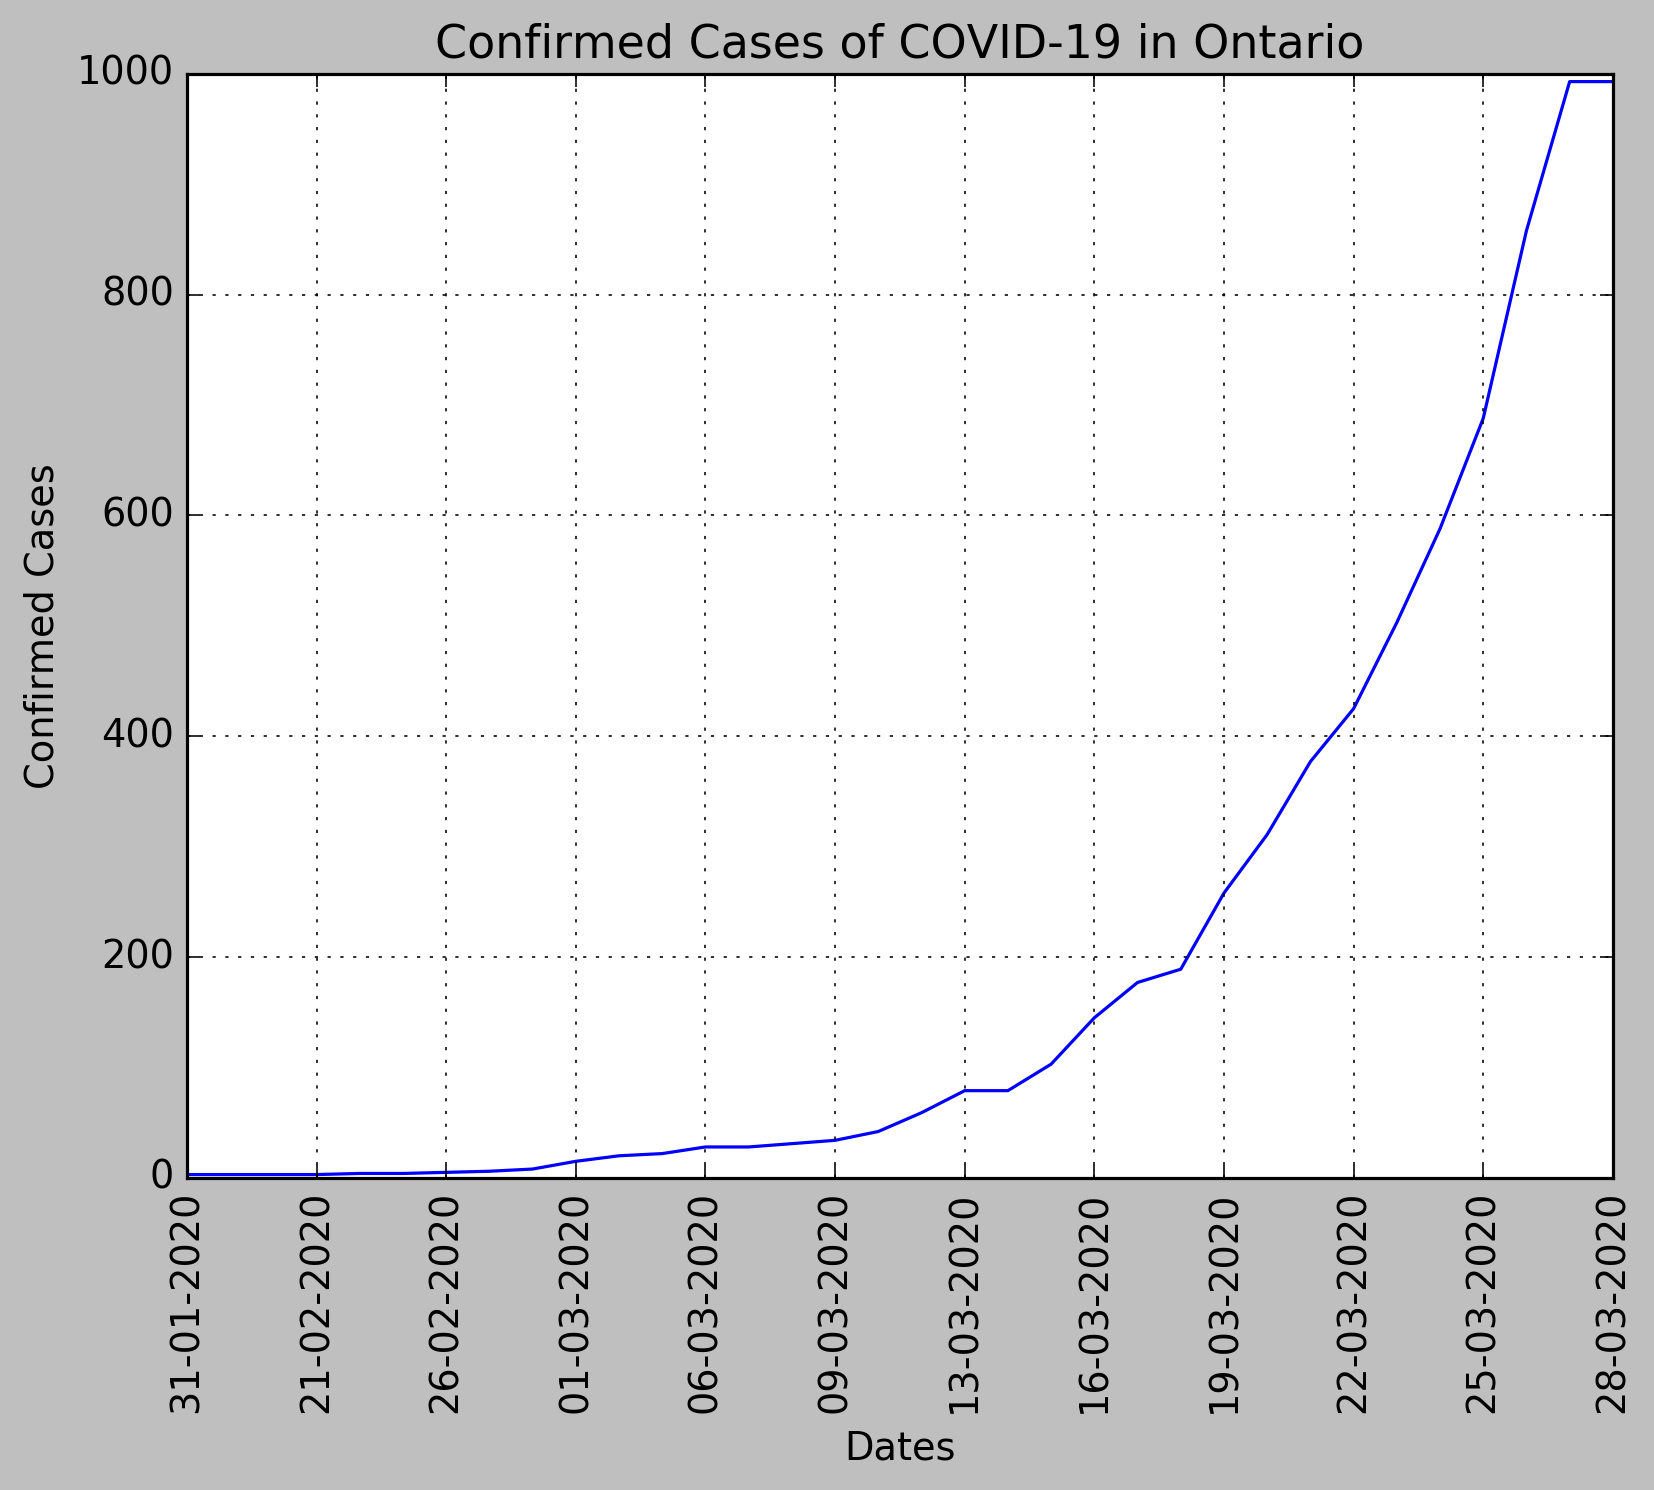

In [5]:
plt.style.use('classic')
fig, ax = plt.subplots(dpi=230)

ax.plot(dates.iloc[0:], confirmedCases.iloc[0:])

ax.set_xlabel('Dates')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed Cases of COVID-19 in Ontario')

# https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation=90)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
ax.xaxis.set_major_locator(plt.MultipleLocator(3)) 

plt.grid()

plt.show()